# Tag with Q

Lets take a look of how a Q-agent performs on the tag problem. We will train it against some random agents, and against another Q-agent to see how things go. We will give the agents a decaying exploration rate, as this makes it clear if the agent has a winning strategy or not.

We will just look how episodes duration evolve over a single training round, and we will use a moving average to make things visible.

In [1]:
import sys

sys.path.append("../..")

from grid_world.grid_world import GridWorld
from grid_world.visualization.format_objects import get_world_str
from utils.returns import returns_from_reward
from notebooks.utils.basics import basic_actions, basic_tag_reward
from exploring_agents import QAgent, RandomAgent
from notebooks.utils.experimentation import moving_average
from exploring_agents.training import train_tag_agents
from notebooks.utils.worlds import tagging_world_01
from grid_world.action import GWorldAction
from exploring_agents.commons.dacaying_functions import get_exp_decay

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(50)

In [2]:
gworld = tagging_world_01
print(get_world_str(gworld))

5                ⚐ 

4                  

3       █  █       

2       █          

1 █  █  █          

0 ⚐                

  0  1  2  3  4  5 


## Random Agents

Lets just see how two random agents behave against each other, to have some baseline.

In [3]:
agent_1 = RandomAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=1,
)

agent_2 = RandomAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=1,
)


episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e4),
    episode_max_length=200,
)

In [4]:
print(f"Agent 1 wins {np.sum([x > 0 for x in agent_1_returns])/len(agent_1_returns):.3f} of rounds, with {np.mean(episode_lengths):.2f} average steps")

Agent 1 wins 0.902 of rounds, with 84.63 average steps


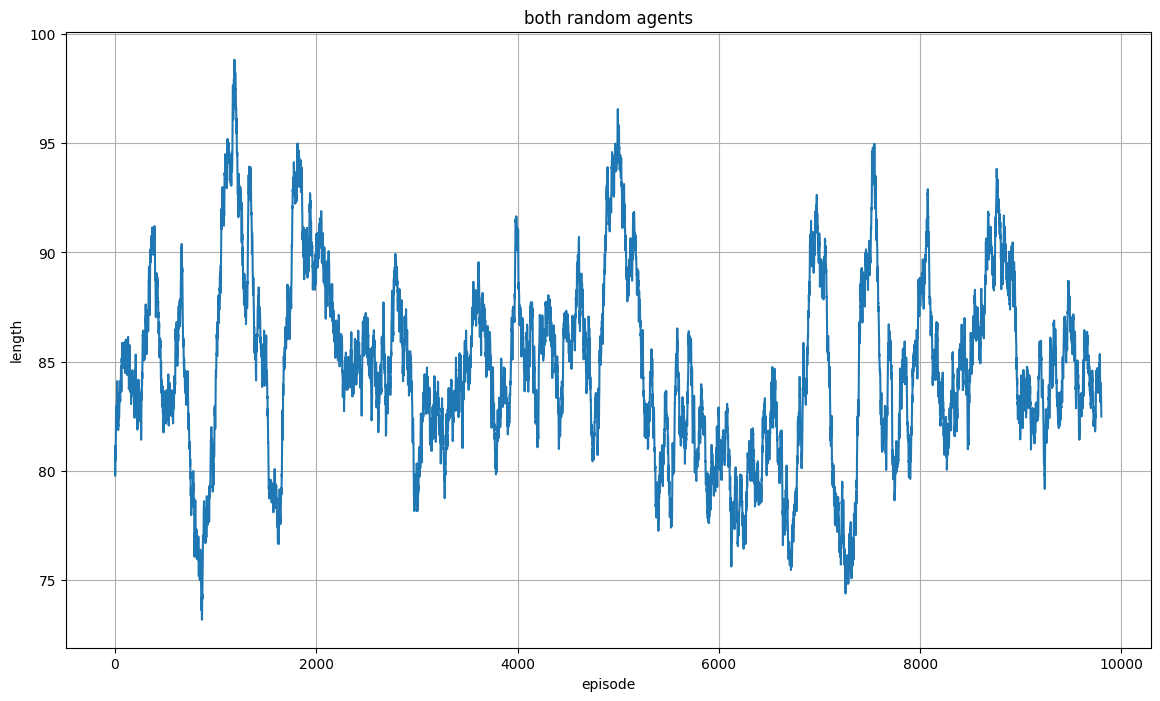

In [5]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("both random agents")


plt.show()

Ok, this looks pretty random, but they do seem to bump into each other every now and then.

## Q vs Random

Ok, now lets see how a Q-learning agent performs against a random one. Both trying to catch, and to run.

In [6]:
random_agent = RandomAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=1,
)

agent_1 = QAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
    alpha=0.3,
    epsilon=0.01,
    epsilon_decay = get_exp_decay(decay_lambda=1e-3, min_value=1e-5),
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=random_agent,
    world=gworld,
    episodes=int(1e4),
    episode_max_length=200,
)

In [7]:
base_path = "../.."
prefix = f"{base_path}/persistence/agents/"
filename1 = "q_vs_random_agent_1_tagging_world_01"

agent_1.dump(f"{prefix}{filename1}")

Lets dump the agent. You can see how it performs by running

`python grid_world/visualization/animation_scripts/tag/q_vs_random_01.py`

You will notice it still pretty bad, but it gets the job done.


In [8]:
print(f"Agent 1 wins {np.sum([x > 0 for x in agent_1_returns])/len(agent_1_returns):.3f} of episodes, with {np.mean(episode_lengths):.2f} average steps")

Agent 1 wins 0.973 of episodes, with 32.65 average steps


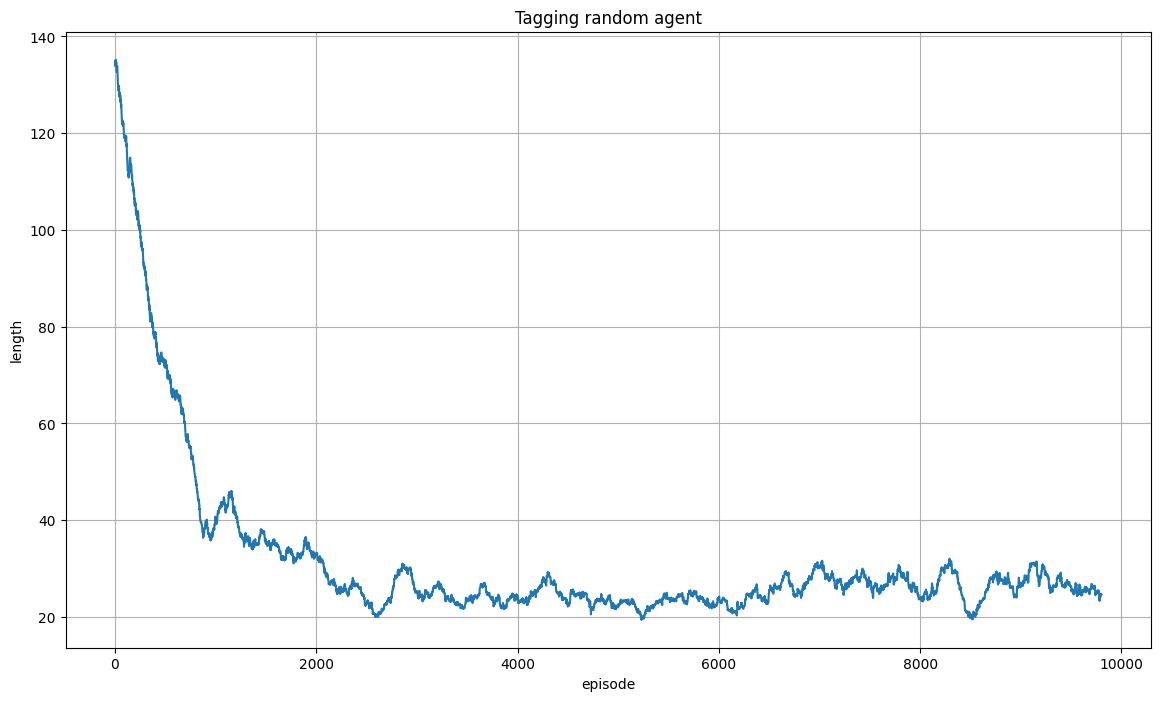

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Tagging random agent")


plt.show()

In [10]:
agent_2 = QAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=1,
    alpha=0.3,
    epsilon=0.01,
    epsilon_decay = get_exp_decay(decay_lambda=1e-3, min_value=1e-3),
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=random_agent,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e4),
    episode_max_length=200,
)

In [11]:
print(f"Agent 2 wins {np.sum([x > 0 for x in agent_2_returns])/len(agent_2_returns):.3f} of episodes, with {np.mean(episode_lengths):.2f} average steps")

Agent 2 wins 0.974 of episodes, with 197.65 average steps


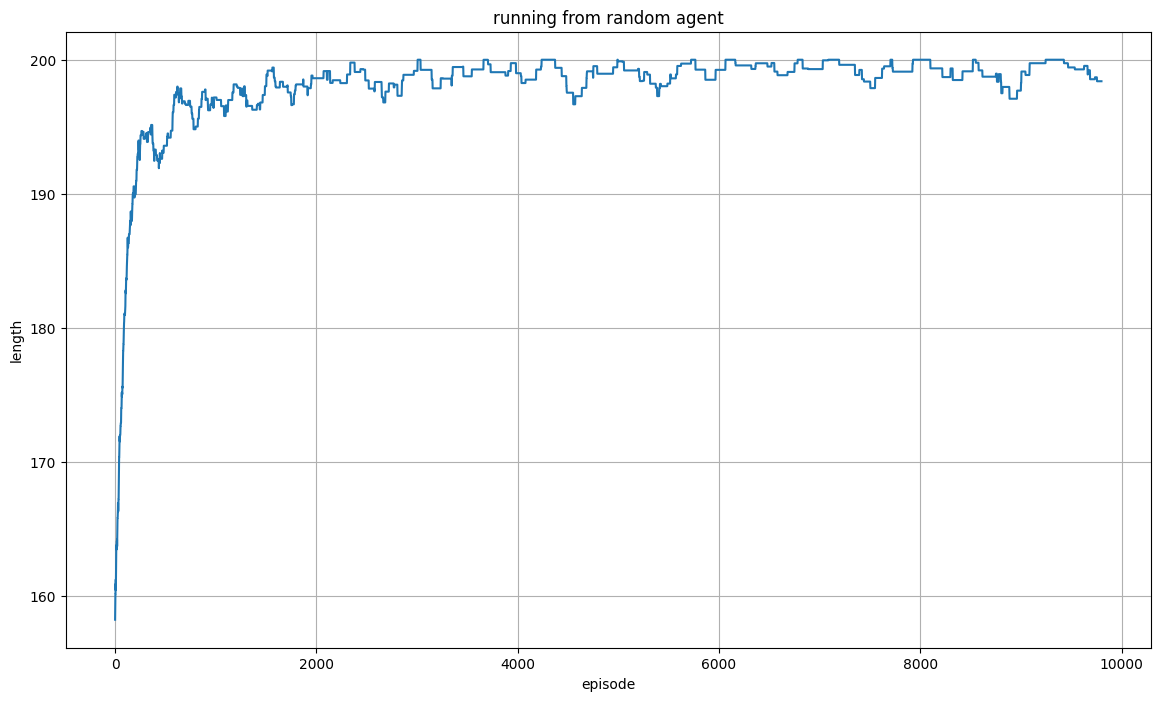

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("running from random agent")


plt.show()

Using q-learn we can have the first agent catch a random agent pretty fast. We can also teach the second agent to extend the episodes quite a lot.  

## Adversarial Q-Agents

Finally lets see what happens with two Q-agents going against each other.

In [13]:
agent_1 = QAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
    alpha=0.3,
    epsilon=0.01,
    epsilon_decay = get_exp_decay(decay_lambda=1e-3, min_value=1e-5),
)

agent_2 = QAgent(
    reward_function=basic_tag_reward,
    actions=basic_actions,
    gamma=0.9,
    alpha=0.3,
    epsilon=0.01,
    epsilon_decay = get_exp_decay(decay_lambda=1e-3, min_value=1e-5),
)

episode_lengths, agent_1_returns, agent_2_returns = train_tag_agents(
    agent_1=agent_1,
    agent_2=agent_2,
    world=gworld,
    episodes=int(1e4),
    episode_max_length=200,
)

In [14]:
print(f"Agent 2 wins {np.sum([x > 0 for x in agent_2_returns])/len(agent_2_returns):.3f} of episodes, with {np.mean(episode_lengths):.2f} average steps")

Agent 2 wins 0.959 of episodes, with 195.73 average steps


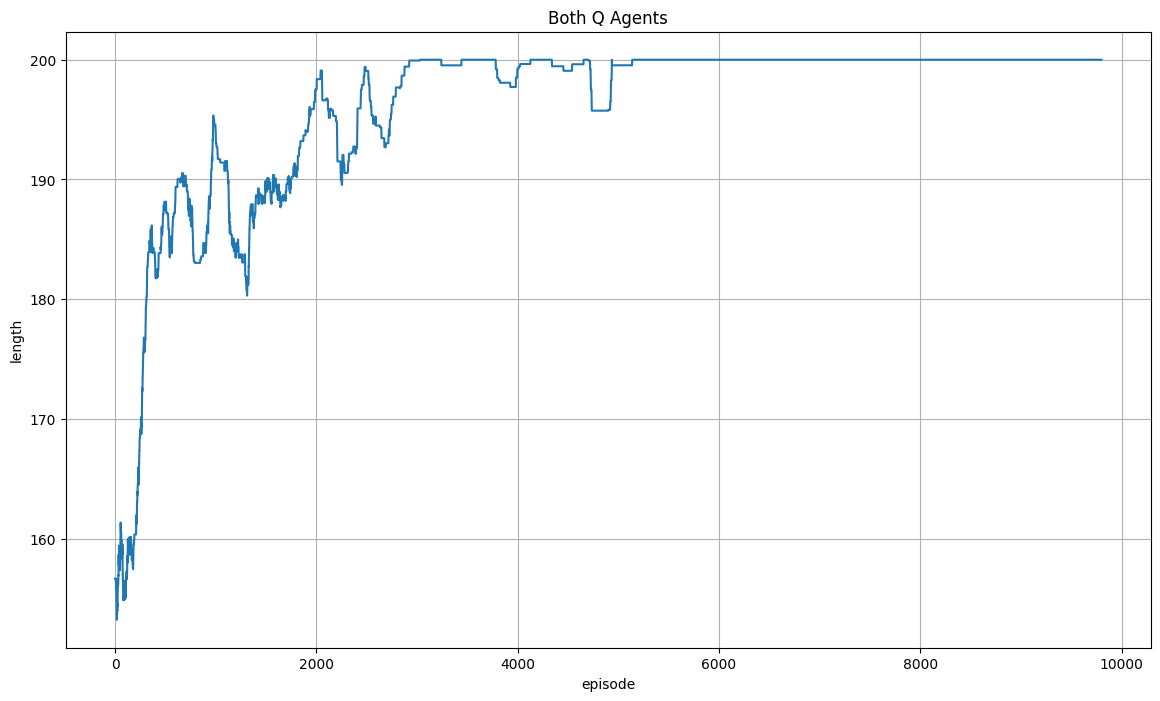

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    moving_average(np.array(episode_lengths), 200),
)

ax.set(xlabel="episode", ylabel="length")
ax.grid()
ax.set_title("Both Q Agents")


plt.show()

This looks pretty cool. At the beggining Agent 1 is capable of winning some episodes, but eventually agent 2 learns to stay away. This together with the decaying exploration rate make the task impossible for Agent 1(it really is impossible given a good policy for agent 2).

In [16]:
filename1 = "q_agent_1_tagging_world_01"
filename2 = "q_agent_2_tagging_world_01"

agent_1.dump(f"{prefix}{filename1}")
agent_2.dump(f"{prefix}{filename2}")

This last cell dumps the agents so we can reuse then. You can check what is going by running(you will need to execute the notebook first though, as the agents are not being commited to github):

`python grid_world/visualization/animation_scripts/tag/q_vs_q_01.py`

You will notice that loots of the agents moves look very weird. That is because Agent 1 moves in this type of situation, where he almost never wins, are very nonsensical. In theory he should learn to chase Agent 2, hoping for a bad move(caused from the exploration policy); but since these moves are prety rare it is hard for the agent to learn this.